<center><h1>Patel_Datt_HW8</h1></center>

Name: Datt Patel 
<br>
Github Username: dattpatel99
<br>
USC ID: 2149812400

## 1. Supervised, Semi-Supervised, and Unsupervised Learning

Import packages

In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import KNeighborsClassifier
from scipy.special import softmax
from sklearn.cluster import KMeans
from sklearn.svm import LinearSVC
import copy
from sklearn.preprocessing import Normalizer
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc, roc_auc_score
from sklearn.exceptions import ConvergenceWarning

In [133]:
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore")

### (a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set

In [134]:
first_columns = ['ID', 'Label']
cols = ['radius','texture','perimeter','area','smoothness','compactness','concavity','concave points','symmetry','fractal dimension']
label = ['mean', 'SD', 'Worst/Largest']

for l in label:
    for col in cols:
        first_columns.append(col + '_' + l)

In [135]:
df1 = pd.read_csv('../data/wdbc.csv', names=first_columns)

In [136]:
df1.head()

,ID,Label,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_Worst/Largest,texture_Worst/Largest,perimeter_Worst/Largest,area_Worst/Largest,smoothness_Worst/Largest,compactness_Worst/Largest,concavity_Worst/Largest,concave points_Worst/Largest,symmetry_Worst/Largest,fractal dimension_Worst/Largest
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [137]:
df1['Label'].replace({'B':0, 'M':1}, inplace=True)

In [138]:
first_labels = df1['Label']
df1.drop(columns=['Label'], inplace=True)
df1['Label'] = first_labels

In [139]:
df1

,ID,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_Worst/Largest,perimeter_Worst/Largest,area_Worst/Largest,smoothness_Worst/Largest,compactness_Worst/Largest,concavity_Worst/Largest,concave points_Worst/Largest,symmetry_Worst/Largest,fractal dimension_Worst/Largest,Label
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [140]:
def splitData(dataset, rand, class_ratio = 0.2):
    # Alter the random seed
    np.random.seed(rand)

    c1_idx = dataset[dataset['Label'] == 0].index
    test_idx_c1 = np.random.choice(c1_idx, round(len(c1_idx) * class_ratio), replace=False)

    c2_idx = dataset[dataset['Label'] == 1].index
    test_idx_c2 = np.random.choice(c2_idx, round(len(c2_idx) * class_ratio), replace=False)

    test_indices = np.concatenate([test_idx_c1,test_idx_c2])
    train_indices = list(set(dataset.index)-set(test_indices))

    train_x, train_y, test_x, test_y = dataset.iloc[train_indices, 1:-1], dataset.iloc[train_indices, -1], dataset.iloc[test_indices, 1:-1], dataset.iloc[test_indices, -1]
    return train_x, train_y, test_x, test_y

In [141]:
train_x, train_y, test_x, test_y = splitData(df1, 20)

In [142]:
train_x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal dimension_mean,...,radius_Worst/Largest,texture_Worst/Largest,perimeter_Worst/Largest,area_Worst/Largest,smoothness_Worst/Largest,compactness_Worst/Largest,concavity_Worst/Largest,concave points_Worst/Largest,symmetry_Worst/Largest,fractal dimension_Worst/Largest
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,24.29,29.41,179.1,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.45,26.40,166.1,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.69,38.25,155.0,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.98,34.12,126.7,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820


In [143]:
df1['Label'].value_counts()

0    357
1    212
Name: Label, dtype: int64

In [144]:
test_y.value_counts()

0    71
1    42
Name: Label, dtype: int64

In [145]:
train_y.value_counts()

0    286
1    170
Name: Label, dtype: int64

### (b) Monte-Carlo Simulation

Repeat the following procedures for supervised, un-supervised, and semi-supervised learning M = 30 times, and use randomly selected train and test data (make sure you use 20% of both the positve and negative classes as the test set). Then compare the average scores (accuracy, precision,recall, F1-score, and AUC) that you obtain from each algorithm.

In [146]:
results = {}
display_cols = ['Accuracy','Precision','Recall','F1','AUC']

#### (i) Supervised Learning

Train an L1-penalized SVM to classify the data.
Use 5 fold cross validation to choose the penalty parameter. Use normalized
data. Report the average accuracy, precision, recall, F1-score, and AUC, for
both training and test sets over your M runs. Plot the ROC and report the
confusion matrix for training and testing in one of the runs.

In [147]:
def evaluateRun(y, yHat, yProb, run, info):
    accuracy = accuracy_score(y, yHat)
    precision =  precision_score(y, yHat)
    recall =  recall_score(y, yHat)
    f1 =  f1_score(y, yHat)
    fpr, tpr, thres = roc_curve(y, yProb, pos_label = 1)
    auc_score = auc(fpr, tpr)
    return {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1": f1, "AUC": auc_score}

In [148]:
def drawRoc(data, info, title):
    fpr, tpr, thres = roc_curve(data[30]['Y'], data[30]['PredProb'], pos_label=1)
    train_roc_auc = auc(fpr, tpr)
    fig, axes = plt.subplots(figsize=(7,7))
    axes.plot(fpr, tpr, label='{} ROC curve, AUC = {}'.format(info, train_roc_auc))
    axes.set_xlabel("False Positive Rate")
    axes.set_ylabel("True Positive Rate")
    axes.legend(loc='best')
    axes.set_title("{} ROC curves of {}".format(info, title))
    plt.show()

In [149]:
def displayResults(train_data, test_data, title):
    # Summarize model Train
    print("Train Details of the Final (30th) run: ")
    train_conf_mat = confusion_matrix(train_data[30]['Y'], train_data[30]['Pred'])
    print('Train Confusion Matrix for {}: \n{}'.format(title, train_conf_mat))
    drawRoc(train_data, 'Train',title)

    # Summarize model Train
    print("Test Details of the Final (30th) run: ")
    test_conf_mat = confusion_matrix(test_data[30]['Y'], test_data[30]['Pred'])
    print('Test Confusion Matrix for {}: \n{}'.format(title, test_conf_mat))
    drawRoc(test_data, 'Test', title)

In [150]:
def monteCarloSVCL1(full_data, repeats, title):
    train_datas = {}
    test_datas = {}
    splitter = StratifiedKFold(5, shuffle=True, random_state=1)
    tuning_params = {'C': np.logspace(-4,6, 20)}
    grid_settings = {
        'param_grid': tuning_params,
        'n_jobs': -1,
        'cv': splitter
    }

    for i in range(repeats):
        # Select Random
        train_x, train_y, test_x, test_y = splitData(full_data, i)
        
        # Normalize
        norm_maker = Normalizer()
        norm_train_X = norm_maker.fit_transform(train_x)  
        norm_test_X = norm_maker.fit_transform(test_x)

        # Make Grid Search     
        grid = GridSearchCV(estimator= LinearSVC(penalty='l1', dual=False), **grid_settings)
        grid.fit(norm_train_X, train_y)

        # Predictions
        y_hat_train = grid.predict(norm_train_X)
        y_hat_test = grid.predict(norm_test_X)

        # Probabilities
        y_prob_train = grid.decision_function(norm_train_X)
        y_prob_test = grid.decision_function(norm_test_X)

        # Evaluations and Data Storing
        results_train = evaluateRun(train_y, y_hat_train, y_prob_train, i, 'Train')
        results_test = evaluateRun(test_y, y_hat_test, y_prob_test, i, 'Test')

        print("Run: {}\nTrain Accuracy: {}, Test Accuracy: {}".format(i+1, results_train['Accuracy'],results_test['Accuracy']))

        results_train["X"] = train_x
        results_train["Y"] = train_y
        results_train["Model"] = grid.best_estimator_
        results_train["Pred"] = y_hat_train
        results_train["PredProb"] = y_prob_train
        
        results_test["X"] = test_x
        results_test["Y"] = test_y
        results_test["Model"] = grid.best_estimator_
        results_test["Pred"] = y_hat_test
        results_test["PredProb"] = y_prob_test

        train_datas[i+1] = results_train
        test_datas[i+1] = results_test

    displayResults(train_datas, test_datas, title)

    return [train_datas, test_datas]

Run: 1
Train Accuracy: 0.9978070175438597, Test Accuracy: 0.9646017699115044
Run: 2
Train Accuracy: 0.9758771929824561, Test Accuracy: 0.9734513274336283
Run: 3
Train Accuracy: 0.9868421052631579, Test Accuracy: 0.9469026548672567
Run: 4
Train Accuracy: 0.9758771929824561, Test Accuracy: 0.9469026548672567
Run: 5
Train Accuracy: 0.9978070175438597, Test Accuracy: 0.9557522123893806
Run: 6
Train Accuracy: 0.9890350877192983, Test Accuracy: 0.9380530973451328
Run: 7
Train Accuracy: 0.9780701754385965, Test Accuracy: 0.9646017699115044
Run: 8
Train Accuracy: 0.9868421052631579, Test Accuracy: 0.9646017699115044
Run: 9
Train Accuracy: 0.9890350877192983, Test Accuracy: 0.9646017699115044
Run: 10
Train Accuracy: 0.9758771929824561, Test Accuracy: 0.9911504424778761
Run: 11
Train Accuracy: 0.9890350877192983, Test Accuracy: 0.9380530973451328
Run: 12
Train Accuracy: 0.9868421052631579, Test Accuracy: 0.9823008849557522
Run: 13
Train Accuracy: 0.9802631578947368, Test Accuracy: 0.982300884955

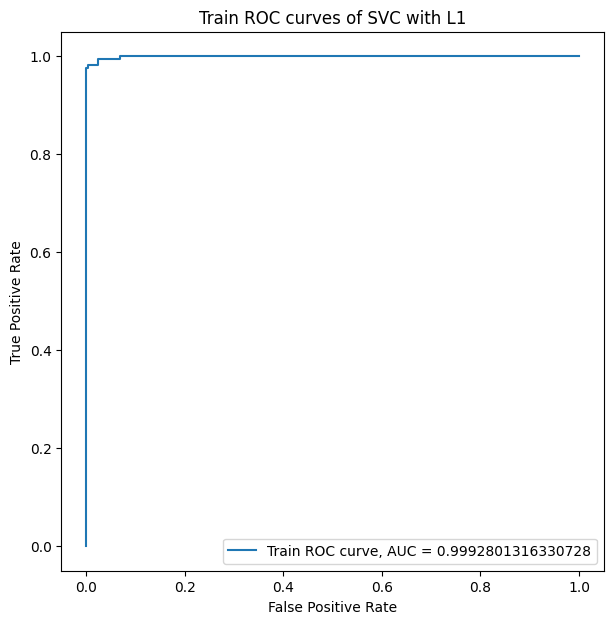

Test Details of the Final (30th) run: 
Test Confusion Matrix for SVC with L1: 
[[69  2]
 [ 5 37]]


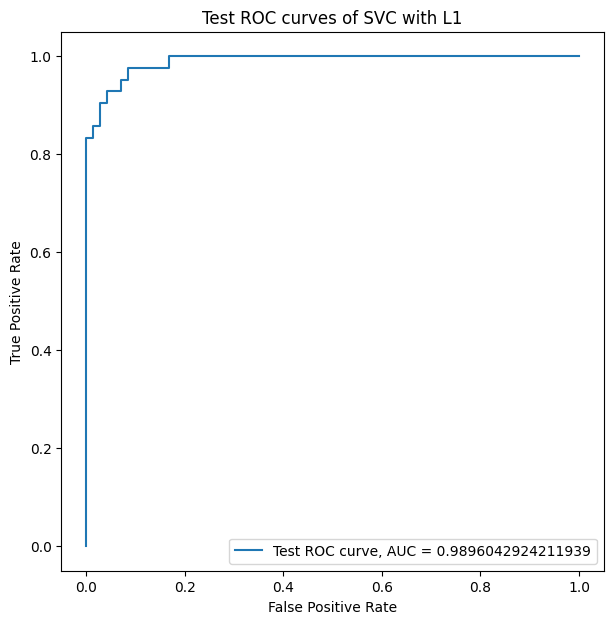

In [151]:
results['SVC with L1'] = monteCarloSVCL1(df1, 30, "SVC with L1")

In [152]:
train_svc, test_svc = results['SVC with L1'][0], results['SVC with L1'][1]
train_series = pd.DataFrame(train_svc).T[display_cols].mean(axis=0)
test_series = pd.DataFrame(test_svc).T[display_cols].mean(axis=0)
data = {"SVC with L1 Train": train_series, "SVC with L1 Test" : test_series}
svc_result_table = pd.DataFrame(data)
svc_result_table.index.name = 'Average'
display(svc_result_table)

,SVC with L1 Train,SVC with L1 Test
Average,,
Accuracy,0.984064,0.960767
Precision,0.984528,0.958529
Recall,0.972549,0.935714
F1,0.978471,0.946528
AUC,0.998800,0.989403


#### (ii) Semi-Supervised Learning/ Self-training

In [153]:
def semiSuperSVM(train_x, train_y, gridParams):

    # Pick Labeled Data & Unlabeled Data
    y = pd.Series(train_y, copy=True)
    y = y.reset_index(drop=True)

    x = pd.DataFrame(train_x, columns = [i for i in range(len(train_x[0]))], index=y.index)

    c1_idx = y[y == 0].index
    unlabeled_idx1 = np.random.choice(c1_idx, round(len(c1_idx) * 0.5), replace=False)
    c2_idx = y[y == 1].index
    unlabeled_idx2 = np.random.choice(c2_idx, round(len(c2_idx) * 0.5), replace=False)

    unlabeledIdx= np.concatenate([unlabeled_idx1, unlabeled_idx2])
    labeledIdx = list(set(y.index)-set(unlabeledIdx))

    labeled_x = x.loc[labeledIdx,:]
    labeled_y = y[labeledIdx]

    unlabeled_x = x.loc[unlabeledIdx,:]
    unlabeled_y = y[unlabeledIdx]

    # Run the first grid search to fit current labeled data
    grid = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False, max_iter=300), **gridParams)
    grid.fit(labeled_x, labeled_y)

    # Run the unsupervisied part until all unlabeled data has some sort of label
    while len(unlabeled_x) > 0:
        # y's
        predProb = grid.decision_function(unlabeled_x)
        
        # weights applied
        w_norm = np.linalg.norm(grid.best_estimator_.coef_)

        # sort the predictions from smallest distance to largest
        farthest_idx = unlabeled_x.index[(np.abs(predProb/w_norm)).argsort()[-1]]
        farthest_pointX = unlabeled_x[unlabeled_x.index == farthest_idx]
        farthest_pointY = unlabeled_y[unlabeled_y.index == farthest_idx]
        
        # remove the farest point from unlabeled and add it to labeled
        labeled_x = pd.concat([labeled_x, farthest_pointX])
        labeled_y = pd.concat([labeled_y, farthest_pointY])

        unlabeled_x.drop([farthest_pointX.index[0]], inplace=True, axis=0)
        unlabeled_y.drop([farthest_pointY.index[0]], inplace=True, axis=0)
        
        # Refit the model
        grid.best_estimator_.fit(labeled_x, labeled_y)

    return grid

In [154]:
def monteCarloSemiSVCL1(full_data, repeats, title):
    train_datas = {}
    test_datas = {}

    splitter = StratifiedKFold(5, shuffle=True, random_state=1)
    tuning_params = {'C': np.logspace(-4,6, 20)}

    grid_settings = {
        'param_grid': tuning_params,
        'n_jobs': -1,
        'cv': splitter
    }

    for i in range(repeats):
        # Select Random
        train_x, train_y, test_x, test_y = splitData(full_data, i)
        
        # Normalize
        norm_maker = Normalizer()
        norm_train_X = norm_maker.fit_transform(train_x)  
        norm_test_X = norm_maker.fit_transform(test_x)

        # Make Semi SVm
        semi_model = semiSuperSVM(norm_train_X, train_y, grid_settings)

        # Predictions
        y_hat_train = semi_model.predict(norm_train_X)
        y_hat_test = semi_model.predict(norm_test_X)

        # Probabilities
        y_prob_train = semi_model.decision_function(norm_train_X)
        y_prob_test = semi_model.decision_function(norm_test_X)

        # Evaluations and Data Storing
        results_train = evaluateRun(train_y, y_hat_train, y_prob_train, i, 'Train')
        results_test = evaluateRun(test_y, y_hat_test, y_prob_test, i, 'Test')

        print("Run: {}\nTrain Accuracy: {}, Test Accuracy: {}".format(i+1, results_train['Accuracy'],results_test['Accuracy']))

        results_train["X"] = train_x
        results_train["Y"] = train_y
        results_train["Model"] = semi_model.best_estimator_
        results_train["Pred"] = y_hat_train
        results_train["PredProb"] = y_prob_train
        
        results_test["X"] = test_x
        results_test["Y"] = test_y
        results_test["Model"] = semi_model.best_estimator_
        results_test["Pred"] = y_hat_test
        results_test["PredProb"] = y_prob_test

        train_datas[i+1] = results_train
        test_datas[i+1] = results_test

    displayResults(train_datas, test_datas, title)

    return [train_datas, test_datas]

Run: 1
Train Accuracy: 0.9890350877192983, Test Accuracy: 0.9646017699115044
Run: 2
Train Accuracy: 0.9692982456140351, Test Accuracy: 0.9557522123893806
Run: 3
Train Accuracy: 0.9868421052631579, Test Accuracy: 0.9469026548672567
Run: 4
Train Accuracy: 0.9956140350877193, Test Accuracy: 0.9646017699115044
Run: 5
Train Accuracy: 0.9912280701754386, Test Accuracy: 0.9646017699115044
Run: 6
Train Accuracy: 0.9868421052631579, Test Accuracy: 0.9380530973451328
Run: 7
Train Accuracy: 0.9758771929824561, Test Accuracy: 0.9823008849557522
Run: 8
Train Accuracy: 0.9780701754385965, Test Accuracy: 0.9646017699115044
Run: 9
Train Accuracy: 0.9824561403508771, Test Accuracy: 0.9469026548672567
Run: 10
Train Accuracy: 0.9780701754385965, Test Accuracy: 0.9911504424778761
Run: 11
Train Accuracy: 0.9780701754385965, Test Accuracy: 0.9469026548672567
Run: 12
Train Accuracy: 0.9846491228070176, Test Accuracy: 0.9823008849557522
Run: 13
Train Accuracy: 0.9824561403508771, Test Accuracy: 0.982300884955

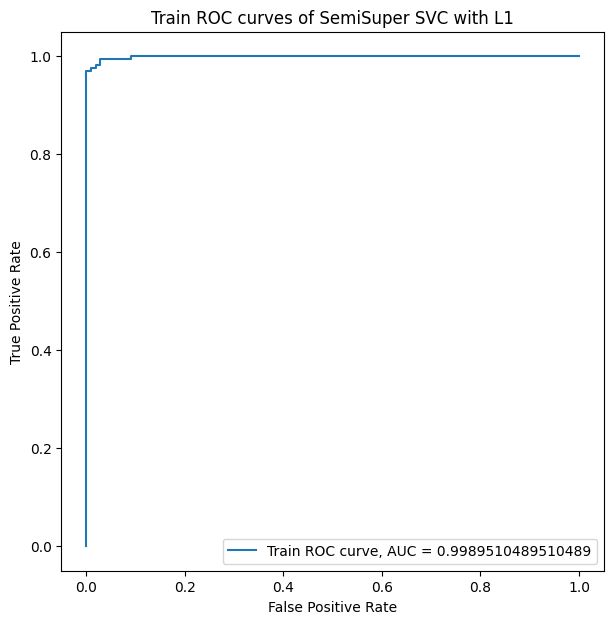

Test Details of the Final (30th) run: 
Test Confusion Matrix for SemiSuper SVC with L1: 
[[69  2]
 [ 4 38]]


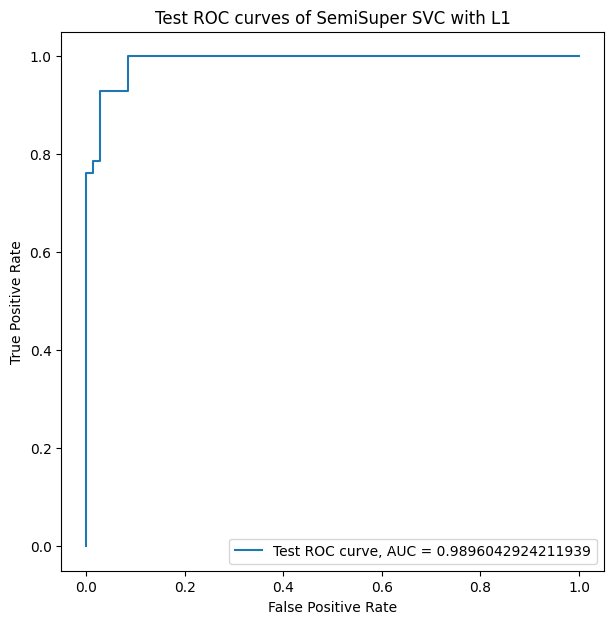

In [155]:
results['Semi_super SVC with L1'] = monteCarloSemiSVCL1(df1, 30, "SemiSuper SVC with L1")

In [156]:
train_semiSVC, test_semiSVC = results['Semi_super SVC with L1'][0], results['Semi_super SVC with L1'][1]
train_series = pd.DataFrame(train_semiSVC).T[display_cols].mean(axis=0)
test_series = pd.DataFrame(test_semiSVC).T[display_cols].mean(axis=0)
data = {"Semi-SVC with L1 Train": train_series, "Semi-SVC with L1 Test" : test_series}
semiSVC_result_table = pd.DataFrame(data)
semiSVC_result_table.index.name = 'Average'
display(semiSVC_result_table)

,Semi-SVC with L1 Train,Semi-SVC with L1 Test
Average,,
Accuracy,0.981652,0.961947
Precision,0.984064,0.965850
Recall,0.966471,0.930952
F1,0.975156,0.947774
AUC,0.998372,0.991180


#### (iii) Unsupervised Learning

In [157]:
# Find the distance of points from cluster centers
# Return distance from their own clusters, distance of all poitns from both centers and probability of poitns being in each cluster
def pointDistances(cluster_center, X, labels):
    distance = {}
    cluster_distance = {}
    probability = {}
    for idx, label in enumerate(labels):
        center = cluster_center[label]
        distance[idx] = np.linalg.norm(X.iloc[idx,:] - center)
        # Getting the distance of all points from both cluster centers
        cluster_distance[idx] = [np.linalg.norm(X.iloc[idx,:]-cluster_center[0]), np.linalg.norm(X.iloc[idx,:]-cluster_center[1])]

    softened_probs = softmax(list(cluster_distance.values()), axis=1)
    for idx, key in enumerate(list(cluster_distance.keys())):
        probability[key] = softened_probs[idx]

    cluster_distance = pd.DataFrame(cluster_distance, index=["Label 0", "Label 1"]).T
    probs = pd.DataFrame(probability, index=["Label 0", "Label 1"]).T
    distance = pd.DataFrame(distance, index=["Distance Center"]).T
    return distance, cluster_distance, probs

# Create a label based on the majority labels
def majorityLabeling(cluster_labels, clus_distances, Y):
    temp = copy.deepcopy(cluster_labels)
    cluster_majority = {}
    for col, cluster in zip(clus_distances.columns, [0,1]):
        sorted_idx = clus_distances.index[np.array(clus_distances.loc[:, col]).argsort()]
        top_thirty = sorted_idx[:30]
        majority_label = Y.iloc[top_thirty].value_counts().index[0]
        cluster_majority[cluster] = majority_label
    return cluster_majority

Q) How do you make sure that the algorithm was not trapped in a local minimum?

A) We set the value of 'n_init' which is the number of interations.

In [158]:
def monteCarloUnsupervised(full_data, repeats, title):
    train_datas = {}
    test_datas = {}

    for i in range(repeats):
        # Select Random
        train_x, train_y, test_x, test_y = splitData(full_data, i)

        # Normalize
        norm_maker = Normalizer()
        norm_train_X = norm_maker.fit_transform(train_x)  
        norm_test_X = norm_maker.fit_transform(test_x)

        norm_train_X = pd.DataFrame(norm_train_X, columns=train_x.columns)
        norm_test_X = pd.DataFrame(norm_test_X, columns=test_x.columns)
        
        # Make Unsupervised Model
        kModel = KMeans(n_clusters=2, n_init=20, random_state=i).fit(norm_train_X)

        # Predicting the labels
        predicted_train_cluster_labels = kModel.predict(norm_train_X)
        predicted_test_cluster_labels = kModel.predict(norm_test_X)

        # Getting Distance of the points
        train_dis, distances_cluster_train, y_prob_train = pointDistances(kModel.cluster_centers_, norm_train_X, predicted_train_cluster_labels)
        test_dis, distances_cluster_test, y_prob_test = pointDistances(kModel.cluster_centers_, norm_test_X, predicted_test_cluster_labels)

        # Getting Majority Labels
        label_of_cluster_train = majorityLabeling(predicted_train_cluster_labels, distances_cluster_train, train_y)
        label_of_cluster_test = majorityLabeling(predicted_test_cluster_labels, distances_cluster_test, test_y)

        # This becomes our y_hat
        majority_predicted_train = []
        majority_predicted_test = []

        for train in predicted_train_cluster_labels:
            majority_predicted_train.append(label_of_cluster_test[train])
        for test in predicted_test_cluster_labels:
            majority_predicted_test.append(label_of_cluster_test[test])

        # Define positive to be label 1
        prob_train = y_prob_train.iloc[:, label_of_cluster_train[0]]
        prob_test = y_prob_test.iloc[:, label_of_cluster_test[0]]

        # Evaluations and Data Storing
        results_train = evaluateRun(train_y, majority_predicted_train, prob_train, i, 'Train')
        results_test = evaluateRun(test_y, majority_predicted_test, prob_test, i, 'Test')

        print("Run: {}\nTrain Accuracy: {}, Test Accuracy: {}".format(i+1, results_train['Accuracy'],results_test['Accuracy']))

        results_train["X"] = train_x
        results_train["Y"] = train_y
        results_train["Model"] = kModel
        results_train["Pred"] = majority_predicted_train
        results_train["PredProb"] = prob_train
        
        results_test["X"] = test_x
        results_test["Y"] = test_y
        results_test["Model"] = kModel
        results_test["Pred"] = majority_predicted_test
        results_test["PredProb"] = prob_test

        train_datas[i+1] = results_train
        test_datas[i+1] = results_test
    
    displayResults(train_datas, test_datas, title)

    return [train_datas, test_datas]

Run: 1
Train Accuracy: 0.8881578947368421, Test Accuracy: 0.8761061946902655
Run: 2
Train Accuracy: 0.8706140350877193, Test Accuracy: 0.9557522123893806
Run: 3
Train Accuracy: 0.8969298245614035, Test Accuracy: 0.8495575221238938
Run: 4
Train Accuracy: 0.8859649122807017, Test Accuracy: 0.911504424778761
Run: 5
Train Accuracy: 0.8991228070175439, Test Accuracy: 0.8761061946902655
Run: 6
Train Accuracy: 0.8859649122807017, Test Accuracy: 0.8672566371681416
Run: 7
Train Accuracy: 0.8793859649122807, Test Accuracy: 0.8938053097345132
Run: 8
Train Accuracy: 0.8859649122807017, Test Accuracy: 0.8672566371681416
Run: 9
Train Accuracy: 0.8881578947368421, Test Accuracy: 0.8584070796460177
Run: 10
Train Accuracy: 0.8793859649122807, Test Accuracy: 0.8938053097345132
Run: 11
Train Accuracy: 0.8925438596491229, Test Accuracy: 0.8761061946902655
Run: 12
Train Accuracy: 0.8793859649122807, Test Accuracy: 0.911504424778761
Run: 13
Train Accuracy: 0.881578947368421, Test Accuracy: 0.902654867256637

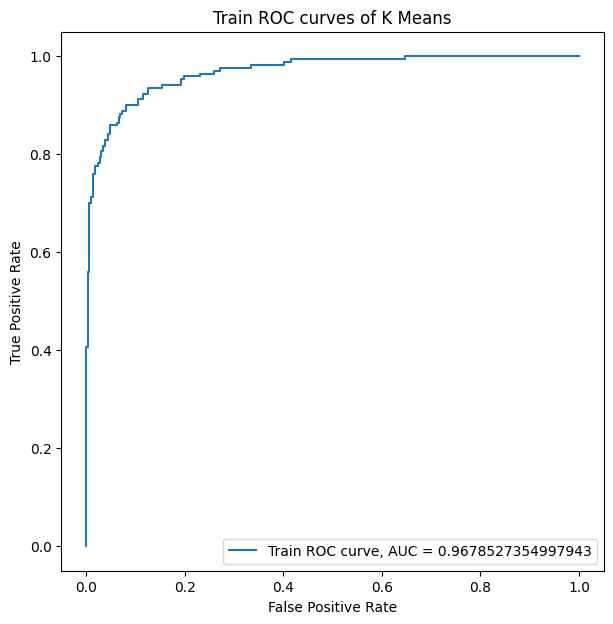

Test Details of the Final (30th) run: 
Test Confusion Matrix for K Means: 
[[70  1]
 [17 25]]


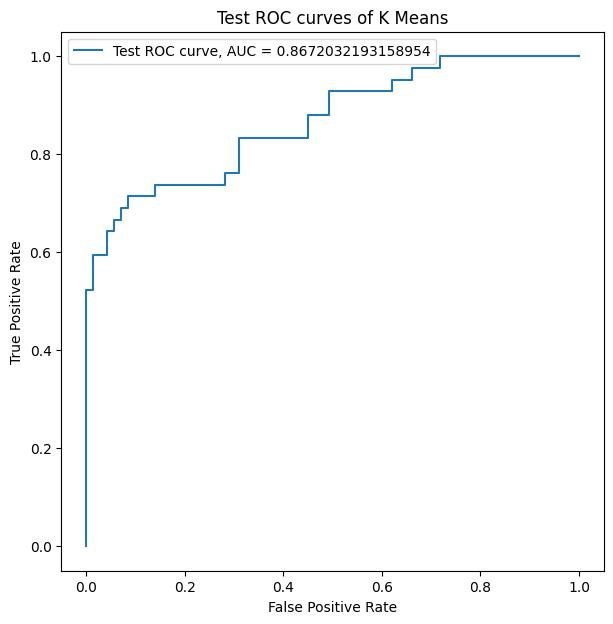

In [159]:
results['KMeans'] = monteCarloUnsupervised(df1, 30, "K Means")

In [160]:
train_kmeans, test_kmeans = results['KMeans'][0], results['KMeans'][1]
train_series = pd.DataFrame(train_kmeans).T[display_cols].mean(axis=0)
test_series = pd.DataFrame(test_kmeans).T[display_cols].mean(axis=0)
data = {"KMeans Train": train_series, "KMeans Test" : test_series}
kmeans_result_table = pd.DataFrame(data)
kmeans_result_table.index.name = 'Average'
display(kmeans_result_table)

,KMeans Train,KMeans Test
Average,,
Accuracy,0.887792,0.882301
Precision,0.957992,0.964652
Recall,0.731176,0.709524
F1,0.829173,0.815811
AUC,0.950710,0.945864


#### (iv) Spectral Clustering

Utilized normalized data instead of raw data to achieve better accuracy results. This might be because the normalized data is in a spatial range where clustering becomes easier 

In [161]:
# Result evaluation for spectral clustering
def spectralEval(y, yHat):
    accuracy = accuracy_score(y, yHat)
    precision =  precision_score(y, yHat)
    recall =  recall_score(y, yHat)
    f1 =  f1_score(y, yHat)
    auc = roc_auc_score(y, yHat)
    return {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1": f1, 'AUC': auc}

# Try multiple gammas and pick one that is closest to the original ratio
def findBestGamma(t1, t0, train_x, rand):
    gammas = {}
    for g in np.logspace(0,10,40):
        model = SpectralClustering(n_clusters=2, affinity='rbf', gamma=g, assign_labels='kmeans', random_state=rand, n_jobs=-1)
        label = model.fit_predict(train_x)
        n_1,n_0 = len(label[label == 1]),len(label[label == 0])
        gammas[g] = np.abs((t1-n_1)/(t1+n_1)) + np.abs((t0-n_0)/(t0+n_0))
    return gammas

# Get TPR And FPR using majoirty labeling and threshold variation
def majorityLabelSpectral(cluster, Y):
    tpr_list, fpr_list = [], []
    pred = [-1 for i in range(Y.shape[0])]
    pred = np.array(pred)

    # Indicies
    idx1 = np.where(cluster == 1)
    idx0 = np.where(cluster == 0)
    # Vary threshold by 0.01
    for thres in np.arange(0,1.1,0.1):
        # Count the true label of points in cluster 1 and 0
        num_pos_1 = len(idx1[0][Y.iloc[idx1[0]] == 1])
        num_pos_0 = len(idx0[0][Y.iloc[idx0[0]] == 1])
        # Define majority labels
        majority_1 = 1 if num_pos_1 / len(idx1[0]) >= thres else 0
        majority_0 = 1 if num_pos_0 / len(idx0[0]) >= thres else 0
        # Define predictions
        pred[idx1[0]] = majority_1
        pred[idx0[0]] = majority_0
        # Get Confusion matrix to get TPR/FPR
        conf = confusion_matrix(Y, pred)
        tn, fp, fn, tp = conf.ravel()
        tpr, fpr = tp/(tp+fn), fp/(fp+tn)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

In [162]:
def plotROCSpectral(tpr, fpr, label):
    fig, axes = plt.subplots(figsize=(7,7))
    axes.plot(fpr, tpr, label = label)
    axes.set_xlabel("False Positive Rate")
    axes.set_ylabel("True Positive Rate")
    axes.set_title("ROC for Spectral Learning")
    axes.legend(loc='best')
    plt.show()

In [163]:
def monteCarloSpectral(full_data, repeats, title):
    train_datas = {}
    test_datas = {}

    for i in range(repeats):
        # Select Random
        train_x, train_y, test_x, test_y = splitData(full_data, i)
        
        # Normalize
        norm_maker = Normalizer()
        norm_train_X = norm_maker.fit_transform(train_x)  
        norm_test_X = norm_maker.fit_transform(test_x)

        norm_train_X = pd.DataFrame(norm_train_X, columns= train_x.columns)
        norm_test_X = pd.DataFrame(norm_test_X, columns= test_x.columns)        

        n_1 = len(train_y[train_y == 1])
        n_0 = len(train_y[train_y == 0])

        # Make Spectral Model
        gammas = findBestGamma(n_1, n_0, norm_train_X, i)
        best_gamma = list(gammas.keys())[np.argmin(list(gammas.values()))]
        # Spectral model        
        model = SpectralClustering(n_clusters=2, affinity='rbf', gamma=best_gamma, assign_labels='kmeans', random_state=i)
        # Predicting train labels
        train_spectral_labels = model.fit_predict(norm_train_X)
        # Using KNN n=1 to get the train and test predictions
        knn = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
        knn.fit(norm_train_X, train_spectral_labels)
        # Predictions        
        y_train_hat = knn.predict(norm_train_X)
        y_test_hat = knn.predict(norm_test_X)
        # Get TPR and FPR using varying threshold of majority polling
        train_tpr, train_fpr = majorityLabelSpectral(y_train_hat, train_y)
        test_tpr, test_fpr = majorityLabelSpectral(y_test_hat, test_y)
        # Evaluate the results
        results_train = spectralEval(train_y, y_train_hat)
        results_test = spectralEval(test_y, y_test_hat)
        # Print Results
        print("Run: {}\nTrain Accuracy: {}, Test Accuracy: {}".format(i+1, results_train['Accuracy'],results_test['Accuracy']))
        
        results_train["X"] = train_x
        results_train["Y"] = train_y
        results_train["Model"] = model
        results_train["Pred"] = y_train_hat
        results_train["TPR"] = train_tpr
        results_train["FPR"] = train_fpr
        
        results_test["X"] = test_x
        results_test["Y"] = test_y
        results_test["Model"] = model
        results_test["Pred"] = y_test_hat
        results_test["TPR"] = test_tpr
        results_test["FPR"] = test_fpr 

        train_datas[i+1] = results_train
        test_datas[i+1] = results_test

    # Summarize model Train
    print("Train Details of the Final (30th) run: ")
    print('Train Confusion Matrix for Spectral: \n{}'.format(confusion_matrix(train_datas[30]['Y'], train_datas[30]['Pred'])))
    plotROCSpectral(train_datas[30]['TPR'], train_datas[30]['FPR'], "Train ROC")

    # Summarize model Test
    print("Test Details of the Final (30th) run: ")
    print('Test Confusion Matrix for Spectral: \n{}'.format(confusion_matrix(test_datas[30]['Y'], test_datas[30]['Pred'])))
    plotROCSpectral(test_datas[30]['TPR'], test_datas[30]['FPR'], "Test ROC")

    return [train_datas, test_datas]

Run: 1
Train Accuracy: 0.8859649122807017, Test Accuracy: 0.8849557522123894
Run: 2
Train Accuracy: 0.868421052631579, Test Accuracy: 0.9203539823008849
Run: 3
Train Accuracy: 0.8903508771929824, Test Accuracy: 0.8495575221238938
Run: 4
Train Accuracy: 0.875, Test Accuracy: 0.8938053097345132
Run: 5
Train Accuracy: 0.5307017543859649, Test Accuracy: 0.6017699115044248
Run: 6
Train Accuracy: 0.8837719298245614, Test Accuracy: 0.8761061946902655
Run: 7
Train Accuracy: 0.8728070175438597, Test Accuracy: 0.8938053097345132
Run: 8
Train Accuracy: 0.8837719298245614, Test Accuracy: 0.8495575221238938
Run: 9
Train Accuracy: 0.11403508771929824, Test Accuracy: 0.1504424778761062
Run: 10
Train Accuracy: 0.875, Test Accuracy: 0.8761061946902655
Run: 11
Train Accuracy: 0.5570175438596491, Test Accuracy: 0.5575221238938053
Run: 12
Train Accuracy: 0.8793859649122807, Test Accuracy: 0.8938053097345132
Run: 13
Train Accuracy: 0.8793859649122807, Test Accuracy: 0.8938053097345132
Run: 14
Train Accurac

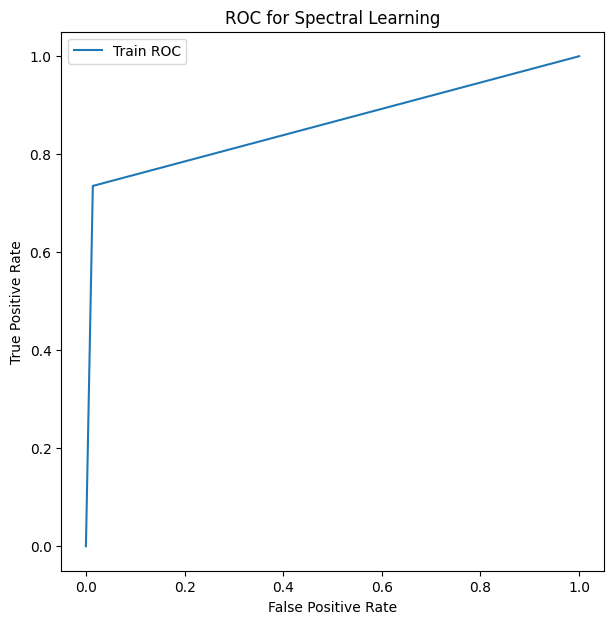

Test Details of the Final (30th) run: 
Test Confusion Matrix for Spectral: 
[[69  2]
 [18 24]]


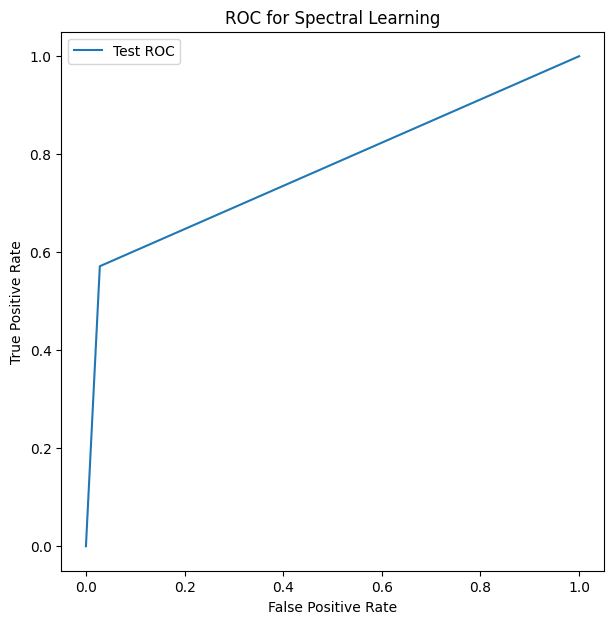

In [164]:
results['Spectral'] = monteCarloSpectral(df1, 30, "Spectral")

In [165]:
train_spectral, test_spectral = results['Spectral'][0], results['Spectral'][1]
train_series = pd.DataFrame(train_spectral).T[display_cols].mean(axis=0)
test_series = pd.DataFrame(test_spectral).T[display_cols].mean(axis=0)
data = {"Spectral Train": train_series, "Spectral Test" : test_series}
spectral_result_table = pd.DataFrame(data)
spectral_result_table.index.name = 'Average'
display(spectral_result_table)

,Spectral Train,Spectral Test
Average,,
Accuracy,0.792471,0.790855
Precision,0.811737,0.824918
Recall,0.605882,0.582540
F1,0.683057,0.667318
AUC,0.754631,0.748312


#### (iv) Compare

In [166]:
final_results = pd.concat([svc_result_table,semiSVC_result_table,kmeans_result_table,spectral_result_table], axis=1)
final_results


,SVC with L1 Train,SVC with L1 Test,Semi-SVC with L1 Train,Semi-SVC with L1 Test,KMeans Train,KMeans Test,Spectral Train,Spectral Test
Average,,,,,,,,
Accuracy,0.984064,0.960767,0.981652,0.961947,0.887792,0.882301,0.792471,0.790855
Precision,0.984528,0.958529,0.984064,0.965850,0.957992,0.964652,0.811737,0.824918
Recall,0.972549,0.935714,0.966471,0.930952,0.731176,0.709524,0.605882,0.582540
F1,0.978471,0.946528,0.975156,0.947774,0.829173,0.815811,0.683057,0.667318
AUC,0.998800,0.989403,0.998372,0.991180,0.950710,0.945864,0.754631,0.748312


Based on the results above we can see that Supervisied has teh best results, then comes Semi-Supervisied, and finally Unsupervisied. The accuracy loss is significantly larger for unsupervisied and semi-supervisied.

## 2. Active Learning Using Support Vector Machines

### (a) Download the banknote authentication Data Set

In [167]:
sec_columns = ['variance of Wavelet Transformed image','skewness of Wavelet Transformed image','curtosis of Wavelet Transformed image','entropy of image','class']
df2 = pd.read_csv('../data/data_banknote_authentication.csv', names=sec_columns)

In [168]:
df2.head()

,variance of Wavelet Transformed image,skewness of Wavelet Transformed image,curtosis of Wavelet Transformed image,entropy of image,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [169]:
df2.tail()

,variance of Wavelet Transformed image,skewness of Wavelet Transformed image,curtosis of Wavelet Transformed image,entropy of image,class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [170]:
test_indicies = np.random.choice(df2.index, 472, replace=False)
train_indicies = list(set(df2.index)-set(test_indicies))

In [171]:
train_x, train_y, test_x, test_y = df2.iloc[train_indicies, :-1],df2.iloc[train_indicies, -1], df2.iloc[test_indicies, :-1],df2.iloc[test_indicies, -1]

In [172]:
train_x

,variance of Wavelet Transformed image,skewness of Wavelet Transformed image,curtosis of Wavelet Transformed image,entropy of image
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
5,4.36840,9.67180,-3.9606,-3.16250
7,2.09220,-6.81000,8.4636,-0.60216
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [173]:
train_y

2       0
3       0
4       0
5       0
7       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: class, Length: 900, dtype: int64

In [174]:
test_x

,variance of Wavelet Transformed image,skewness of Wavelet Transformed image,curtosis of Wavelet Transformed image,entropy of image
989,-6.75260,8.81720,-0.061983,-3.72500
765,-3.84830,-12.80470,15.682400,-1.28100
1036,-2.38980,-0.78427,3.014100,0.76205
268,0.92970,-3.79710,4.642900,-0.29570
1106,-0.12690,-1.15050,-0.951380,0.57843
...,...,...,...,...
1360,-0.24745,1.93680,-2.469700,-0.80518
274,5.27560,0.13863,0.121380,1.14350
509,-0.29510,9.04890,-0.527250,-2.07890
930,-2.22140,-0.23798,0.560080,0.05602


In [175]:
test_y

989     1
765     1
1036    1
268     0
1106    1
       ..
1360    1
274     0
509     0
930     1
678     0
Name: class, Length: 472, dtype: int64

### (b) Repeat each of the following two procedures 50 times

#### (i) Passive

In [176]:
def monteCarlo(runs, learner, train_x, train_y, test_x, test_y):
    learner_results = {}
    for i in range(runs):
        learner_results[i+1] = learner(train_x, train_y, test_x, test_y)
    return learner_results

In [177]:
def passiveLearner(train_x, train_y, test_x, test_y):
    splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=20)
    tuning_params = {'C': np.logspace(0, 5, 20)}
    grid_settings = {
        'param_grid': tuning_params,
        'n_jobs': -1,
        'cv': splitter
    }
    used_indicies = []
    errors = {}
    temp_train_y = copy.deepcopy(train_y)
    for i in range(90):
        train_indicies = np.random.choice(temp_train_y.index, 10, replace=False)
        unique_classes = len(train_y.loc[train_indicies].value_counts().index)
        while unique_classes != 2:
            train_indicies = np.random.choice(temp_train_y.index, 10, replace=False)
            unique_classes = len(train_y.loc[train_indicies].value_counts().index)            
        used_indicies.extend(train_indicies)
        cur_train = train_x.loc[used_indicies]
        cur_labels = train_y.loc[used_indicies]
        temp_train_y.drop(train_indicies, inplace=True)
        grid = GridSearchCV(estimator = LinearSVC(penalty='l1', dual=False), **grid_settings)
        grid.fit(cur_train, cur_labels)
        y_hat = grid.predict(test_x)
        error = 1-accuracy_score(test_y, y_hat)
        errors[i+1] = {'Model': grid.best_estimator_, 'Num Train': len(used_indicies),'Error': error}
    return errors

In [178]:
passive_results = monteCarlo(50, passiveLearner, train_x, train_y, test_x, test_y)

#### (ii) Active

In [181]:
def activeLearner(train_x, train_y, test_x, test_y):
    splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=20)
    tuning_params = {'C': np.logspace(0, 5, 20)}
    grid_settings = {
        'param_grid': tuning_params,
        'n_jobs': -1,
        'cv': splitter
    }
    used_indicies, train_indicies = [], []
    errors = {}
    temp_train_x = copy.deepcopy(train_x)
    train_indicies = np.random.choice(temp_train_x.index, 10, replace=False)
    unique_classes = len(train_y.loc[train_indicies].value_counts().index)
    while unique_classes != 2:
        train_indicies = np.random.choice(temp_train_x.index, 10, replace=False)
        unique_classes = len(train_y.loc[train_indicies].value_counts().index)            
    used_indicies.extend(train_indicies)
    for i in range(90):
        cur_train = train_x.loc[used_indicies]
        cur_labels = train_y.loc[used_indicies]
        temp_train_x.drop(train_indicies, inplace=True)
        grid = GridSearchCV(estimator = LinearSVC(penalty='l1', dual=False), **grid_settings)
        grid.fit(cur_train, cur_labels)
        y_hat = grid.predict(test_x)
        error = 1-accuracy_score(test_y, y_hat)
        errors[i+1] = {'Model': grid.best_estimator_, 'Num Train': len(used_indicies),'Error': error}
        # Select the next few indicies and store in train_indicies
        if(temp_train_x.shape[0] == 0):
            break
        distances = grid.decision_function(temp_train_x)
        sorted_distances = temp_train_x.index[np.argsort(np.abs(distances))]
        train_indicies = sorted_distances[:10]
        used_indicies.extend(train_indicies)
    return errors

In [182]:
active_results = monteCarlo(50, activeLearner, train_x, train_y, test_x, test_y)

### (c) Average the 50 test errors

In [183]:
active_errors = []
passive_errors = []
# Average out the errors
for i in range(1, 91, 1):
    sum_errors = 0
    sum_pass = 0
    for j in range(1, 51, 1):
        sum_errors += active_results[j][i]['Error']
        sum_pass += passive_results[j][i]['Error']
    active_errors.append(sum_errors/50)
    passive_errors.append(sum_pass/50)
number_train = [i for i in range(10,910, 10)]

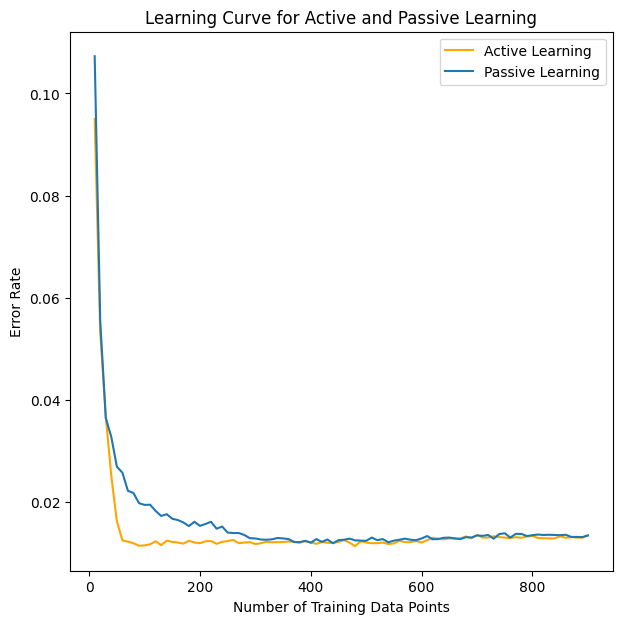

In [184]:
fig, axes = plt.subplots(figsize=(7,7))
axes.plot(number_train, active_errors, label='Active Learning', color='orange')
axes.plot(number_train, passive_errors, label='Passive Learning')
axes.set_xlabel("Number of Training Data Points")
axes.set_ylabel("Error Rate")
axes.legend(loc='best')
axes.set_title('Learning Curve for Active and Passive Learning')
plt.show()

# References:

Sorting I was going to use: https://stackoverflow.com/questions/16486252/is-it-possible-to-use-argsort-in-descending-order

Finding the distance from boundary: https://stackoverflow.com/questions/32074239/sklearn-getting-distance-of-each-point-from-decision-boundary
